In [12]:
import processing as pro
import fitting as fit
import visualize as vis
import peaks as pks
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from lmfit.models import GaussianModel, ConstantModel

In [13]:
def plot_xps(raman_shift, intensity, peaks=None, labels=None, mtl_name=None):
    """
    Plots the Raman spectrum, alongside peak information.

    Inputs:
    - raman_shift: Array containing Raman shift values.
    - intensity: Array containing Respective intensity values.
    - peaks: Dictionary containing peaks data, if it exists.
    - labels: User created list containing labels, left to right, of expected peaks, if it exists.
    - mtl_name: User created string labelling name of plotted material, if it exists.
    
    """
    plt.figure(figsize=(11, 6))
    plt.plot(raman_shift, intensity, color='red')    
    plt.xlabel('Binding Energy (eV)')
    plt.ylabel('Intensity (a.u.)')
    if mtl_name:
        plt.title(f"{mtl_name}")
    plt.show()

In [14]:
file_path = "../Raman/Cs1.xlsx"  

In [15]:
x, y, df, yx = pro.read_raman_data(file_path, 1, csv=False, map=False)

Reading Excel file...


,eV,counts
0,299.975,2746.6665
1,299.950,2700.0000
2,299.925,2693.3333
3,299.900,2670.0000
4,299.875,2806.6665
...,...,...
994,275.125,2713.3333
995,275.100,2690.0000
996,275.075,2700.0000
997,275.050,2683.3333


In [16]:
x = np.array(sorted(x))

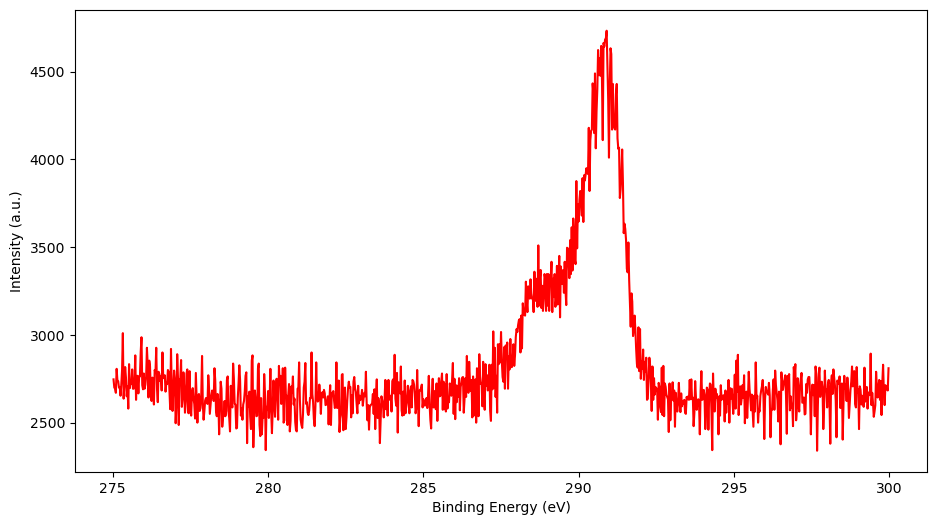

In [17]:
plot_xps(x,y)

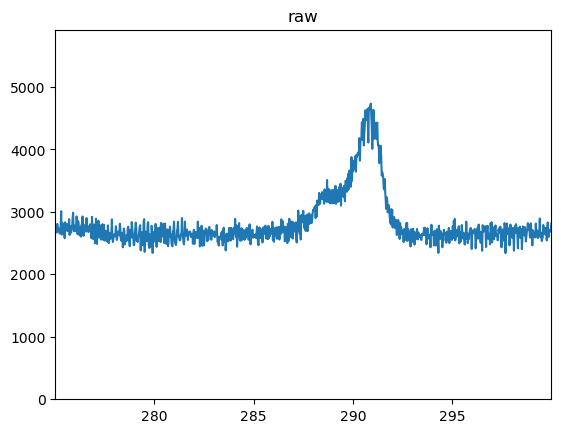

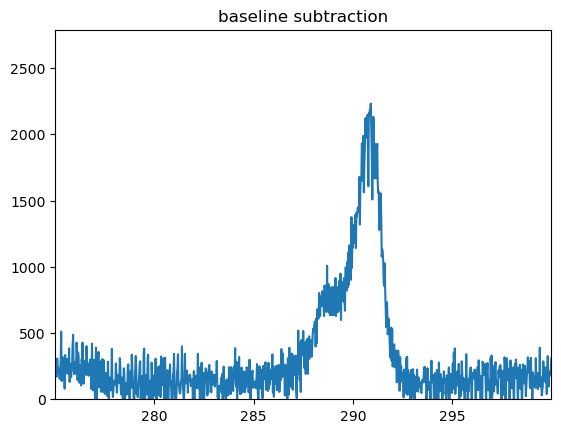

In [18]:
y = np.array(pro.remove_baseline(x,y, 1))

In [19]:
#model = ConstantModel()
#pars = model.make_params()

In [20]:
#gauss1 = GaussianModel(prefix='g1_')
#pars.update(gauss1.make_params(center=dict(value=700, min=285, max=287),
#                               fwhm=dict(value=0.5, min=0),
#                               amplitude=dict(value=3500, min=0)))

#gauss2 = GaussianModel(prefix='g2_')
#pars.update(gauss2.make_params(center=dict(value=290.9, min=283, max=285),
#                               fwhm=dict(value=1.5, min=0),
#                               amplitude=dict(value=2000, min=0)))

In [21]:
#mod = gauss1 + gauss2 + model

In [22]:
#init = mod.eval(pars, x=x)
#out = mod.fit(y, pars, x=x)

In [23]:
#fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
#axes[0].plot(x, y)
#axes[0].plot(x, init, '--', label='initial fit')
#axes[0].plot(x, out.best_fit, '-', label='best fit')
#axes[0].legend()

#comps = out.eval_components(x=x)
#axes[1].plot(x, y)
#axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
#axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')

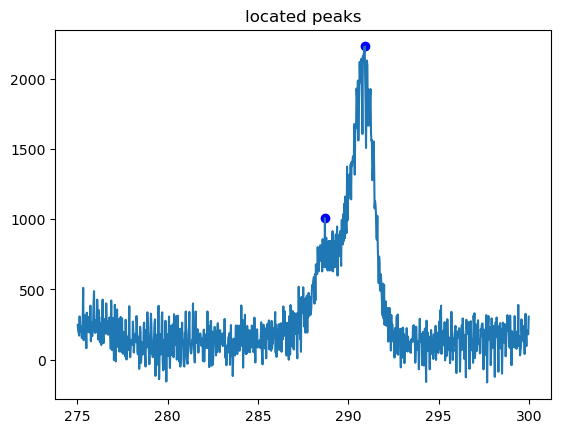

{'peak_indices': array([547, 635]), 'peak_intensity': array([1008.34738537, 2231.27749808]), 'peak_raman_shifts': array([288.7, 290.9]), 'peak_widths': [0.029579285564125257, 1.5705004718350324], 'width_heights': array([ 803.28325784, 1037.28307602]), 'left_ips': array([288.68535237, 289.95458321]), 'right_ips': array([288.71493166, 291.52508368])}


In [24]:
peaks = pks.identify_peaks(x, y, 750, 50)
print(peaks)

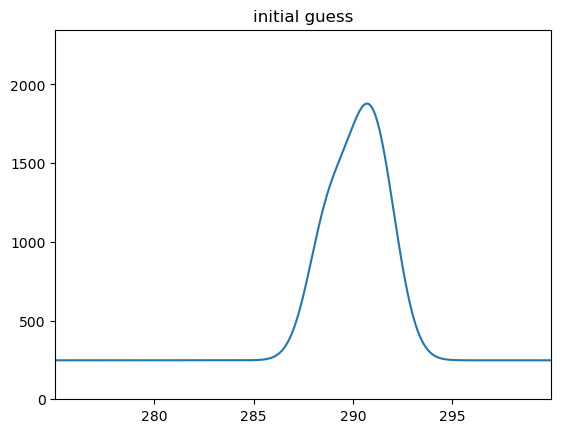

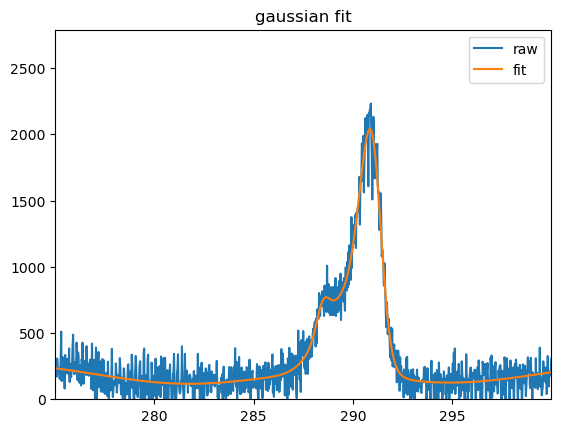

R^2 score: 0.9354621144076682


In [25]:
gy, g_r2 = fit.raman_gfitter(x, y, peaks)

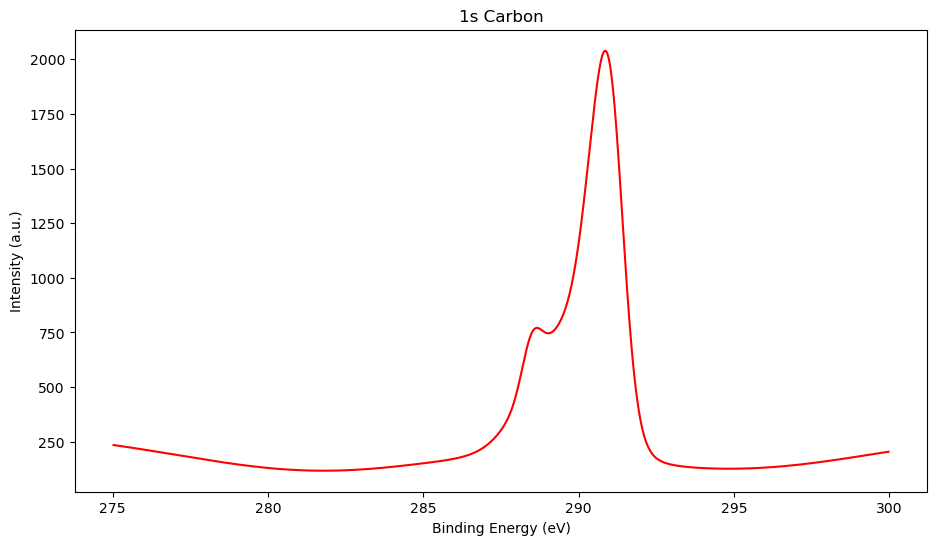

In [26]:
plot_xps(x,gy, mtl_name = "1s Carbon")

In [27]:
#Fitting this curve with two separate gaussians is coming up next

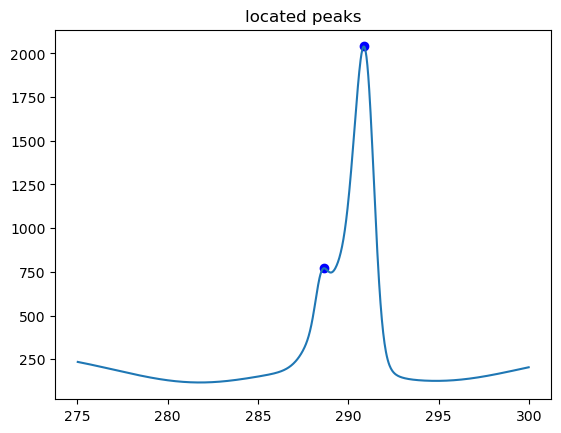

In [28]:
peaks = pks.identify_peaks(x, gy, 750, 50)

In [29]:
peaks

{'peak_indices': array([545, 633]),
 'peak_intensity': array([ 770.65364362, 2039.51684494]),
 'peak_raman_shifts': array([288.65, 290.85]),
 'peak_widths': [0.2980580139211497, 1.5752658604855014],
 'width_heights': array([ 758.25989492, 1082.76142455]),
 'left_ips': array([288.53151531, 289.91890678]),
 'right_ips': array([288.82957332, 291.49417264])}

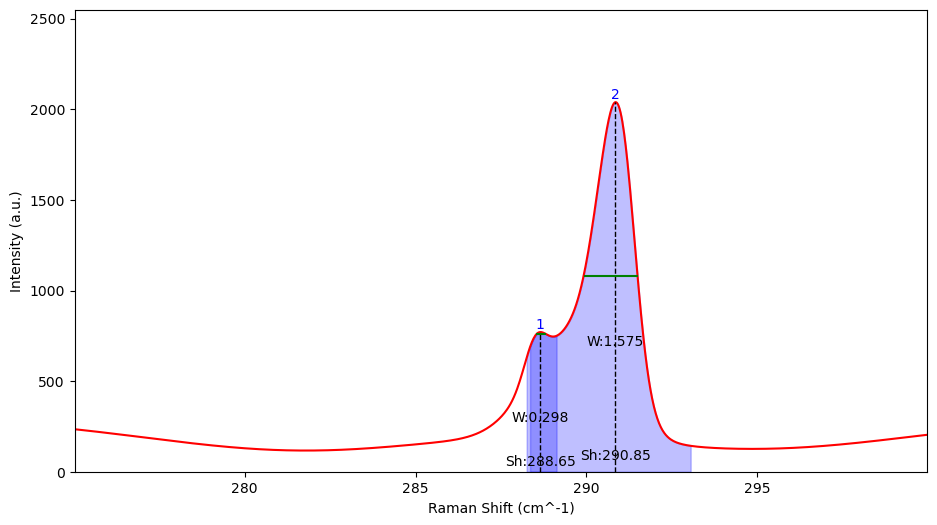

In [30]:
vis.plot_spectrum(x,gy,peaks, labels = ["1", "2"])

In [31]:
model = ConstantModel()
pars = model.make_params()

In [32]:
gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params(center=dict(value=288.65, min=288, max=289),
                               fwhm=dict(value=0.3, min=0),
                               amplitude=dict(value=770.65364362, min=0)))

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params(center=dict(value=290.85, min=290.5, max=291),
                               fwhm=dict(value=1.5752658604855014, min=0),
                               amplitude=dict(value=2039.51684494, min=0)))

name,value,initial value,min,max,vary,expression
c,0.00000000,None,-inf,inf,True,
g1_amplitude,770.653644,770.65364362,0.00000000,inf,True,
g1_center,288.650000,288.65,288.000000,289.000000,True,
g1_sigma,1.00000000,None,0.00000000,inf,True,
g1_fwhm,0.30000000,0.3,0.00000000,inf,False,
g1_height,307.446337,None,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"
g2_amplitude,2039.51684,2039.51684494,0.00000000,inf,True,
g2_center,290.850000,290.85,290.500000,291.000000,True,
g2_sigma,1.00000000,None,0.00000000,inf,True,
g2_fwhm,1.57526586,1.5752658604855014,0.00000000,inf,False,


In [33]:
mod = gauss1 + gauss2 + model

In [34]:
init = mod.eval(pars, x=x)
out = mod.fit(gy, pars, x=x)

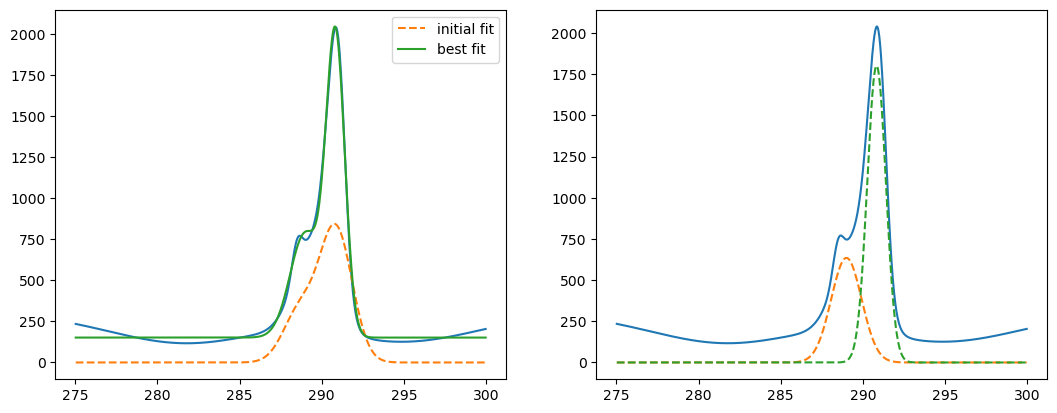

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, gy)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, gy)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')